Logistic Regression over Breast Cancer Dataset (Bi-Class Classification)

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as s
import matplotlib.pyplot as plt

Importing the Datasets

In [2]:
data= pd.read_csv("C:\\Users\\lucif\\Documents\\Jupiter_Notebook\\Datasets\\data.csv")
columns=data.columns

Pre-processing the data

In [3]:
data.drop(labels=[columns[32]],axis=1,inplace=True)
data.drop(labels=[columns[0]],axis=1,inplace=True)

Separating Label Column

In [4]:
#separating class column
class_label=data.iloc[:,0:1]
class_label.replace(to_replace=['B','M'],value=(0,1),inplace=True)
class_train=np.array(class_label.iloc[:int(0.7*data.shape[0])])
class_test=np.array(class_label.iloc[int(0.7*data.shape[0]):])

C:\Users\lucif\Anaconda3\envs\TF\lib\site-packages\pandas\core\frame.py:4278: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


Splitting Training and Testing Data

In [5]:
training_len=int(0.7*data.shape[0])
train_data=data.iloc[:training_len]
testing_data=data.iloc[training_len:]
testing_data.drop(labels=[columns[1]],axis=1,inplace=True)
train_data.drop(labels=[columns[1]],axis=1,inplace=True)
mn=train_data.mean()
std=train_data.std()
train_data=(train_data-mn)/std
testing_data=(testing_data-mn)/std
train_data=np.array(train_data)
testing_data=np.array(testing_data)

C:\Users\lucif\Anaconda3\envs\TF\lib\site-packages\pandas\core\frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Defining the Sigmoid Function

In [6]:
def sigmoid(theta0,theta,train_data):
    return 1/(1+np.exp(-(np.matmul(train_data,theta)+theta0)))

Defining Function for Negative Log Loss

In [7]:
def Neg_loss(theta0,theta):
    h=sigmoid(theta0,theta,train_data)
    return -(1/training_len)*(np.matmul((class_train.T),np.log(h))+np.matmul(((1-class_train).T),np.log(1-h)))

Initializing variables for Gradient Descent

In [8]:
epsilon=0.0001
alpha=0.01
theta_init=np.random.randn(30,1)
theta0_init=np.random.randn(1,1)
neg_log_loss_history=[]
i=0

Training through Gradient Descent

In [9]:
while True:
    H=sigmoid(theta0_init,theta_init,train_data)
    
    H=H.reshape(398,1)
    
    theta0_final=theta0_init-(alpha*(1/training_len)*np.sum(H-class_train))
    
    theta_final=theta_init-(alpha*(1/training_len)*(np.matmul((H-class_train).T,train_data)).T)
    
    if abs(Neg_loss(theta0_init,theta_init)-Neg_loss(theta0_final,theta_final))<epsilon:
        break
        
    theta0_init=theta0_final
    
    theta_init=theta_final
    
    neg_log_loss_history.append(Neg_loss(theta0_init,theta_init))
    
    #Uncomment Following line for Verbose on Loss and Iteration
    #print('Iteration=',i,', Log Loss Value=',neg_log_loss_history[i])
    
    i+=1

Defining Testing Function which returns True positive, False positives and accuracy over provided data

In [10]:
def testing(testing_data,class_test,V=True):
    
    H_test=1/(1+np.exp(-(theta0_final+np.matmul(testing_data,theta_final))))
    
    bool_mask=H_test>0.5
    
    bool_mask=np.uint8(bool_mask)
    
    x=np.count_nonzero(np.equal(bool_mask,class_test))
    
    acc=(x*100)/class_test.shape[0]
    
    tn=0
    tp=0
    fn=0
    fp=0
    
    for i in range(0,class_test.size):
        if(class_test[i]==1 and bool_mask[i]==1):
            tn+=1
        elif(class_test[i]==1 and bool_mask[i]==0):
            fp+=1
        elif(class_test[i]==0 and bool_mask[i]==1):
            fn+=1
        elif(class_test[i]==0 and bool_mask[i]==0):
            tp+=1     
            
    if V==True:
        print("Recall=",100*tp/(tp+fn))
        print("Precision=",100*tp/(tp+fp))
        print("Accuracy=",acc)
        
    tpr=tp/(tp+fn)
    fpr=fp/(fp+tn)
    
    return tpr,fpr,acc

Testing our Model on the Testing Data

In [11]:
y,x,_=testing(testing_data,class_test)

Recall= 96.96969696969697
Precision= 97.70992366412214
Accuracy= 95.90643274853801


Preparing to plot ROC curve

In [12]:
i=0
ROCx=[1,0]
ROCy=[1,0]

while i<5:
    index=np.array(np.random.choice(list(range(training_len)),100),dtype=int)
    
    index.sort()
    
    new_test=train_data[list(index)]    
    
    new_class=class_train[list(index)]
    
    y,x,_=testing(new_test,new_class,V=False)
    
    ROCx.append(x)
    ROCy.append(y)
    i+=1

Plotting ROC Curve

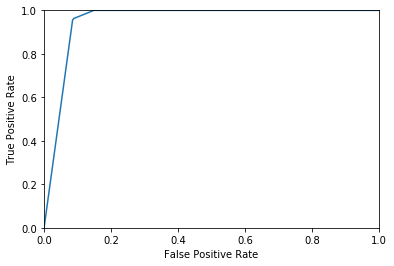

In [13]:
ROCx.sort()
ROCy.sort()

plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(ROCx,ROCy)